In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [52]:
f= pd.read_csv("C:\\data science class\\assignments\\XGBM & LGBM_compl\\Titanic_train.csv")
df = f[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [53]:
df['Age'] = pd.to_numeric(df['Age'])  
# if any column contains method with numeric value then you need to first convert5 that ethod into numeric and then do all mean, median
med=df['Age'].median()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7024\2629810530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'])


In [54]:
#Data Cleaning
df.info()
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(med)
df=df.dropna()

print(df.isnull().sum())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7024\149256923.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(med)


(889, 8)

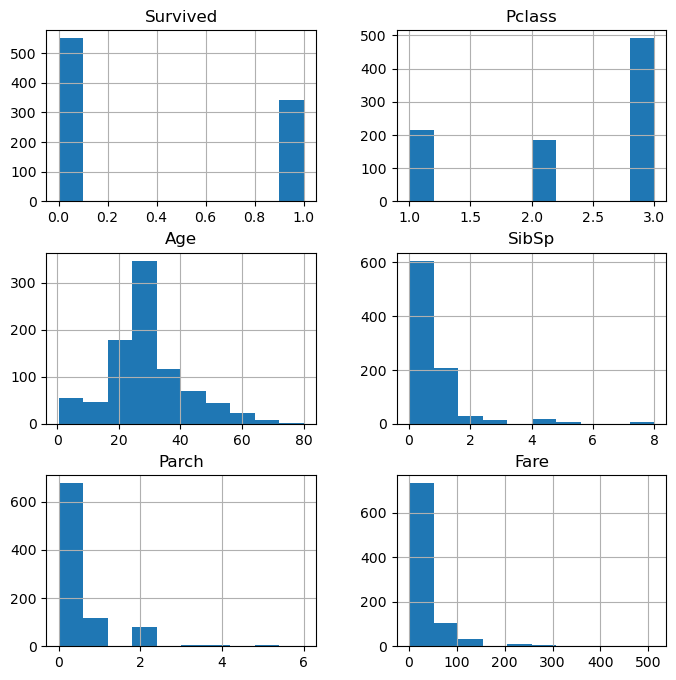

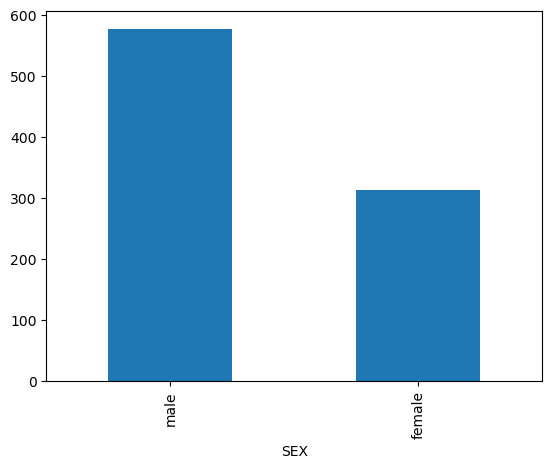

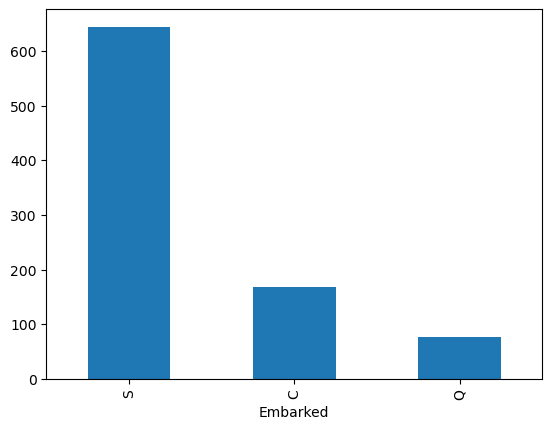

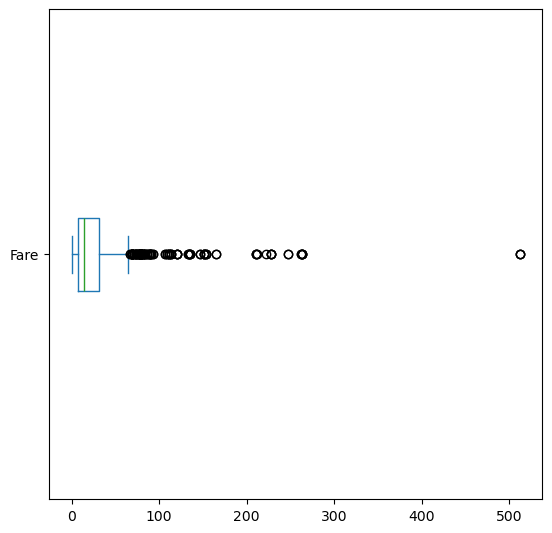

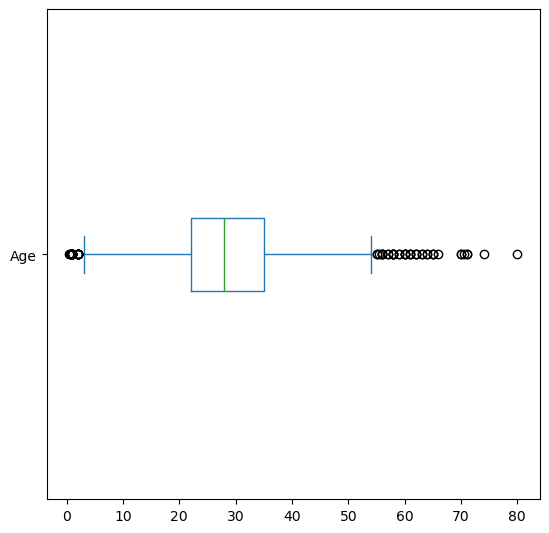

In [55]:
#EDA -  Histogram, bar graph
df.hist(figsize=(8,8))
plt.show()

values = df['Sex'].value_counts()
values.plot(kind='bar')
plt.xlabel("SEX")
plt.show()

values = df['Embarked'].value_counts()
values.plot(kind='bar')
plt.xlabel("Embarked")
plt.show()

# Boxplot
df['Fare'].plot(kind='box', subplots=True, layout=(2,2),figsize=(14,14), vert=False)
plt.xlabel("Fare")
plt.show()

df['Age'].plot(kind='box', subplots=True, layout=(2,2),figsize=(14,14), vert=False)
plt.xlabel("Age")
plt.show()

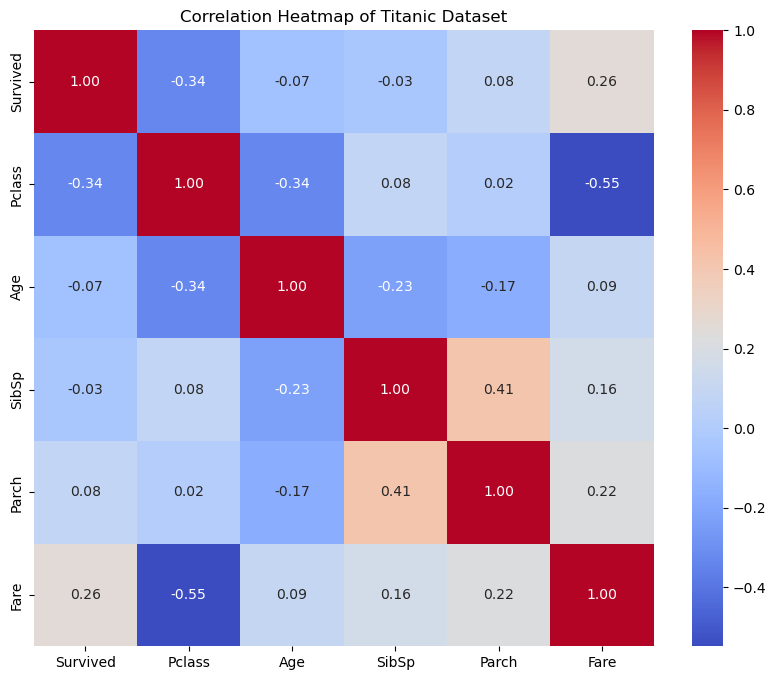

In [51]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

In [8]:
X_train=df[['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare','Embarked']]
Y_train=df['Survived']

In [9]:
#data transformation
#target variables is already transformed
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS = StandardScaler()
LE = LabelEncoder()

SS_X = SS.fit_transform(X_train[['Pclass','Age','SibSp', 'Parch', 'Fare']])
SS_X= pd.DataFrame(SS_X)
SS_X.columns = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']

LE_X_sex= LE.fit_transform(X_train[['Sex']])
LE_X_sex = pd.DataFrame(LE_X_sex)
LE_X_sex.columns=['Sex']

LE_X_Embarked= LE.fit_transform(X_train[['Embarked']])
LE_X_Embarked = pd.DataFrame(LE_X_Embarked)
LE_X_Embarked.columns=['Embarked']

X_train = pd.concat([SS_X, LE_X_sex,LE_X_Embarked], axis=1)
X_train


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.825209,-0.563674,0.431350,-0.474326,-0.500240,1,2
1,-1.572211,0.669217,0.431350,-0.474326,0.788947,0,0
2,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,0,2
3,-1.572211,0.438050,0.431350,-0.474326,0.422861,0,2
4,0.825209,0.438050,-0.475199,-0.474326,-0.484133,1,2
...,...,...,...,...,...,...,...
884,-0.373501,-0.178396,-0.475199,-0.474326,-0.384475,1,2
885,-1.572211,-0.794841,-0.475199,-0.474326,-0.042213,0,2
886,0.825209,-0.101340,0.431350,2.006119,-0.174084,0,2
887,-1.572211,-0.255451,-0.475199,-0.474326,-0.042213,1,0


In [19]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [23]:
import xgboost as xgb 
from sklearn.metrics import log_loss
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators = 100,Learning_rate=100,gamma=10,reg_lambda = 10)
xgb_model.fit(X_train, Y_train)

y_pred_train_xgb = xgb_model.predict(X_train)

training_accuracy_xgb = accuracy_score(Y_train, y_pred_train_xgb)
training_loss_xgb = log_loss(Y_train, y_pred_train_xgb)

print("XGBoost - Training Accuracy:", np.round(training_accuracy_xgb,4))
print("XGBoost - Training Loss:", np.round(training_loss_xgb,4))

XGBoost - Training Accuracy: 0.8099
XGBoost - Training Loss: 6.8519


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:23:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
#  TEST DATA
f_test= pd.read_csv("C:\\data science class\\assignments\\XGBM & LGBM_compl\\Titanic_test.csv")
df_test = f[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df_test

#Data Cleaning of test
df_test['Age'] = pd.to_numeric(df_test['Age'], errors='coerce')  # converting method to numeric value
med=df_test['Age'].median()

df_test.info()
print(df_test.isnull().sum()) #finding the null value in test data sheet

df_test['Age'] = df_test['Age'].fillna(med) # filling null value of age variables with median value
df_test=df_test.dropna() # droping null value 

X_test=df_test[['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare','Embarked']]

#data transformation of test
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS = StandardScaler()
LE = LabelEncoder()

SS_X_test = SS.fit_transform(X_test[['Pclass','Age','SibSp', 'Parch', 'Fare']])
SS_X_test= pd.DataFrame(SS_X_test)
SS_X_test.columns = ['Pclass','Age', 'SibSp', 'Parch', 'Fare']

LE_X_test_sex= LE.fit_transform(X_test[['Sex']])
LE_X_test_sex = pd.DataFrame(LE_X_test_sex)
LE_X_test_sex.columns=['Sex']

LE_X_test_Embarked= LE.fit_transform(X_test[['Embarked']])
LE_X_test_Embarked = pd.DataFrame(LE_X_test_Embarked)
LE_X_test_Embarked.columns=['Embarked']

X_test = pd.concat([SS_X_test, LE_X_test_sex,LE_X_test_Embarked], axis=1)
X_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7024\3856059606.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'] = pd.to_numeric(df_test['Age'], errors='coerce')  # converting method to numeric value
C:\Users\lenovo\AppData\Local\Temp\ipykernel_7024\3856059606.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'] = df_test['Age'].fillna(med) # filling null value of age variables with median value
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessin

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0.825209,-0.563674,0.431350,-0.474326,-0.500240,1,2
1,-1.572211,0.669217,0.431350,-0.474326,0.788947,0,0
2,0.825209,-0.255451,-0.475199,-0.474326,-0.486650,0,2
3,-1.572211,0.438050,0.431350,-0.474326,0.422861,0,2
4,0.825209,0.438050,-0.475199,-0.474326,-0.484133,1,2
...,...,...,...,...,...,...,...
884,-0.373501,-0.178396,-0.475199,-0.474326,-0.384475,1,2
885,-1.572211,-0.794841,-0.475199,-0.474326,-0.042213,0,2
886,0.825209,-0.101340,0.431350,2.006119,-0.174084,0,2
887,-1.572211,-0.255451,-0.475199,-0.474326,-0.042213,1,0


In [25]:
# predicting Y for test data 
y_pred_test_xgb = xgb_model.predict(X_test)  #prediction on model fitted with X_train, Y_train from train datasheet
y_pred_test_xgb = pd.DataFrame(y_pred_test_xgb) # converting array to dataframe
y_pred_test_xgb

,0
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,0


In [15]:
# using grid search cv to find best tunning parameter value
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 1, 0.01],
    'gamma': [10, 20, 50],
    'reg_lambda': [1, 5, 10]
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy') # You can change scoring as needed

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# Evaluate the best model on the train set
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_pred_train)
print(f"Test accuracy of the best model: {train_accuracy}")

Best parameters: {'gamma': 10, 'learning_rate': 1, 'n_estimators': 100, 'reg_lambda': 1}
Test accuracy of the best model: 0.8312710911136107


In [27]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators = 100,gamma=10,Learning_rate=1,reg_lambda = 1)
xgb_model.fit(X_train, Y_train)

y_pred_train_xgb = xgb_model.predict(X_train)

training_accuracy_xgb = accuracy_score(Y_train, y_pred_train_xgb)
training_loss_xgb = log_loss(Y_train, y_pred_train_xgb)

print("XGBoost - Training Accuracy:", np.round(training_accuracy_xgb,4))
print("XGBoost - Training Loss:", np.round(training_loss_xgb,4))

y_pred_test_xgb = xgb_model.predict(X_test)  #prediction on model fitted with X_train, Y_train from train datasheet
y_pred_test_xgb = pd.DataFrame(y_pred_test_xgb) # converting array to dataframe
y_pred_test_xgb

XGBoost - Training Accuracy: 0.8279
XGBoost - Training Loss: 6.2032


C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "Learning_rate" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,0
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,0


In [1]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42,n_estimators = 100,learning_rate=100,reg_lambda = 10)
lgb_model.fit(X_train, Y_train)

y_pred_train_lgb = lgb_model.predict(X_train)

training_accuracy_lgb = accuracy_score(Y_train, y_pred_train_xgb)
training_loss_lgb = log_loss(Y_train, y_pred_train_xgb)

print("LGMBoost - Training Accuracy:", np.round(training_accuracy_lgb,4))
print("LGMBoost - Training Loss:", np.round(training_loss_lgb,4))

y_pred_test_lgb = xgb_model.predict(X_test)  #prediction on model fitted with X_train, Y_train from train datasheet
y_pred_test_lgb = pd.DataFrame(y_pred_test_lgb) # converting array to dataframe
y_pred_test_lgb

[LightGBM] [Info] Number of positive: 340, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 889, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382452 -> initscore=-0.479153
[LightGBM] [Info] Start training from score -0.479153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because 

,0
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,0


In [32]:
# using grid search cv to find best tunning parameter value
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 1, 0.01],
    'reg_lambda': [1, 5, 10]
}

# Create the XGBoost classifier
lgb_model = lgb.LGBMClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy') # You can change scoring as needed

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(f"Best parameters: {best_params}")

# Evaluate the best model on the train set
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_pred_train)
print(f"Test accuracy of the best model: {train_accuracy}")

[LightGBM] [Info] Number of positive: 272, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382560 -> initscore=-0.478697
[LightGBM] [Info] Start training from score -0.478697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [38]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42,n_estimators = 100,learning_rate=0.1,reg_lambda = 5)
lgb_model.fit(X_train, Y_train)

y_pred_train_lgb = lgb_model.predict(X_train)

training_accuracy_lgb = accuracy_score(Y_train, y_pred_train_xgb)
training_loss_lgb = log_loss(Y_train, y_pred_train_xgb)

print("LGMBoost - Training Accuracy:", np.round(training_accuracy_lgb,4))
print("LGMBoost - Training Loss:", np.round(training_loss_lgb,4))

y_pred_test_lgb = xgb_model.predict(X_test)  #prediction on model fitted with X_train, Y_train from train datasheet
y_pred_test_lgb = pd.DataFrame(y_pred_test_lgb) # converting array to dataframe
y_pred_test_lgb

[LightGBM] [Info] Number of positive: 340, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 889, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382452 -> initscore=-0.479153
[LightGBM] [Info] Start training from score -0.479153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,0
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,1
886,0
887,0


In [39]:
#Comparision 
print("XGBoost - Training Accuracy:", np.round(training_accuracy_xgb,4))
print("XGBoost - Training Loss:", np.round(training_loss_xgb,4))

print("LGBoost - Training Accuracy:", np.round(training_accuracy_lgb,4))
print("LGBoost - Training Loss:", np.round(training_loss_lgb,4))


XGBoost - Training Accuracy: 0.8279
XGBoost - Training Loss: 6.2032
LGBoost - Training Accuracy: 0.8279
LGBoost - Training Loss: 6.2032
